In [2]:
# import neccessary libraries
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline




In [79]:
# Preliminary examination
# Read smaller part of data file (10000 rows) and show sample using t delimiter as it's a txt file

data = pd.read_csv(r'..\data\raw\ebd_NL_201501_202309_smp_relAug-2023.txt', nrows=100000, delimiter='\t')

data.head()

C:\Users\desgr\AppData\Local\Temp\ipykernel_28668\1462207042.py:4: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'..\data\raw\ebd_NL_201501_202309_smp_relAug-2023.txt', nrows=100000, delimiter='\t')


,GLOBAL UNIQUE IDENTIFIER,LAST EDITED DATE,TAXONOMIC ORDER,CATEGORY,TAXON CONCEPT ID,COMMON NAME,SCIENTIFIC NAME,SUBSPECIES COMMON NAME,SUBSPECIES SCIENTIFIC NAME,EXOTIC CODE,...,NUMBER OBSERVERS,ALL SPECIES REPORTED,GROUP IDENTIFIER,HAS MEDIA,APPROVED,REVIEWED,REASON,TRIP COMMENTS,SPECIES COMMENTS,Unnamed: 49
0,URN:CornellLabOfOrnithology:EBIRD:OBS289650802,2023-05-15 10:16:16.067471,21611,species,avibase-9BE53D34,Eurasian Blue Tit,Cyanistes caeruleus,NaN,NaN,NaN,...,2.0,1,G1099737,0,1,0,NaN,NaN,NaN,NaN
1,URN:CornellLabOfOrnithology:EBIRD:OBS289650837,2023-05-15 10:16:16.067471,21611,species,avibase-9BE53D34,Eurasian Blue Tit,Cyanistes caeruleus,NaN,NaN,NaN,...,2.0,1,G1099737,0,1,0,NaN,NaN,NaN,NaN
2,URN:CornellLabOfOrnithology:EBIRD:OBS289650840,2023-05-15 10:16:16.067471,21073,species,avibase-26FB62DA,Carrion Crow,Corvus corone,NaN,NaN,NaN,...,2.0,1,G1099737,0,1,0,NaN,NaN,NaN,NaN
3,URN:CornellLabOfOrnithology:EBIRD:OBS289650805,2023-05-15 10:16:16.067471,21073,species,avibase-26FB62DA,Carrion Crow,Corvus corone,NaN,NaN,NaN,...,2.0,1,G1099737,0,1,0,NaN,NaN,NaN,NaN
4,URN:CornellLabOfOrnithology:EBIRD:OBS289650804,2023-05-15 10:16:16.067471,1888,species,avibase-760F307A,Common Wood-Pigeon,Columba palumbus,NaN,NaN,NaN,...,2.0,1,G1099737,0,1,0,NaN,NaN,NaN,NaN


In [80]:
data.columns

Index(['GLOBAL UNIQUE IDENTIFIER', 'LAST EDITED DATE', 'TAXONOMIC ORDER',
       'CATEGORY', 'TAXON CONCEPT ID', 'COMMON NAME', 'SCIENTIFIC NAME',
       'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 'EXOTIC CODE',
       'OBSERVATION COUNT', 'BREEDING CODE', 'BREEDING CATEGORY',
       'BEHAVIOR CODE', 'AGE/SEX', 'COUNTRY', 'COUNTRY CODE', 'STATE',
       'STATE CODE', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE',
       'USFWS CODE', 'ATLAS BLOCK', 'LOCALITY', 'LOCALITY ID', 'LOCALITY TYPE',
       'LATITUDE', 'LONGITUDE', 'OBSERVATION DATE',
       'TIME OBSERVATIONS STARTED', 'OBSERVER ID', 'SAMPLING EVENT IDENTIFIER',
       'PROTOCOL TYPE', 'PROTOCOL CODE', 'PROJECT CODE', 'DURATION MINUTES',
       'EFFORT DISTANCE KM', 'EFFORT AREA HA', 'NUMBER OBSERVERS',
       'ALL SPECIES REPORTED', 'GROUP IDENTIFIER', 'HAS MEDIA', 'APPROVED',
       'REVIEWED', 'REASON', 'TRIP COMMENTS', 'SPECIES COMMENTS',
       'Unnamed: 49'],
      dtype='object')

In [6]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GLOBAL UNIQUE IDENTIFIER    10000 non-null  object 
 1   LAST EDITED DATE            10000 non-null  object 
 2   TAXONOMIC ORDER             10000 non-null  int64  
 3   CATEGORY                    10000 non-null  object 
 4   TAXON CONCEPT ID            10000 non-null  object 
 5   COMMON NAME                 10000 non-null  object 
 6   SCIENTIFIC NAME             10000 non-null  object 
 7   SUBSPECIES COMMON NAME      293 non-null    object 
 8   SUBSPECIES SCIENTIFIC NAME  293 non-null    object 
 9   EXOTIC CODE                 399 non-null    object 
 10  OBSERVATION COUNT           10000 non-null  object 
 11  BREEDING CODE               258 non-null    object 
 12  BREEDING CATEGORY           258 non-null    object 
 13  BEHAVIOR CODE               258 

None

In [4]:
# Function to sample some random rows

def random_sample_data(df, rows=20):
    
    ''' this function samples a random selection of
        20 rows within the dataframe and shows 
        the results'''
    
    sampled_data = df.sample(rows)
    for col in df.columns:
        print(f"Column: {col}")
        print(sampled_data[col])
        print("\n" + "-"*50 + "\n")

display(random_sample_data(data))


Column: GLOBAL UNIQUE IDENTIFIER
7368     URN:CornellLabOfOrnithology:EBIRD:OBS302201762
8651    URN:CornellLabOfOrnithology:EBIRD:OBS1247539921
4593     URN:CornellLabOfOrnithology:EBIRD:OBS298355988
7471     URN:CornellLabOfOrnithology:EBIRD:OBS301612075
2347    URN:CornellLabOfOrnithology:EBIRD:OBS1579017611
160      URN:CornellLabOfOrnithology:EBIRD:OBS290377692
8559     URN:CornellLabOfOrnithology:EBIRD:OBS307769372
4145    URN:CornellLabOfOrnithology:EBIRD:OBS1247540059
1534     URN:CornellLabOfOrnithology:EBIRD:OBS289439158
9525     URN:CornellLabOfOrnithology:EBIRD:OBS907059548
4047     URN:CornellLabOfOrnithology:EBIRD:OBS298905924
3662    URN:CornellLabOfOrnithology:EBIRD:OBS1157392451
4800     URN:CornellLabOfOrnithology:EBIRD:OBS299184935
5401     URN:CornellLabOfOrnithology:EBIRD:OBS294517719
2897     URN:CornellLabOfOrnithology:EBIRD:OBS839480223
979      URN:CornellLabOfOrnithology:EBIRD:OBS293079341
5910    URN:CornellLabOfOrnithology:EBIRD:OBS1091861882
3640     URN:Co

None

In [5]:
# the following columns need to be removed as they are not useful or contain no information [COUNTRY, COUNTY, COUNTY CODE, IBA CODE, BCR CODE, USFWS CODE, ATLAS BLOCK, 
# SAMPLING EVENT IDENTIFIER, PROJECT CODE, EFFORT AREA HA, GROUP IDENTIFIER, CATEGORY, SUBSPECIES COMMON NAME, SUBSPECIES SCIENTIFIC NAME,
# EXOTIC CODE, APPROVED, REVIEWED, REASON, Unnamed: 49]

columns_to_drop = ['COUNTRY', 'COUNTY', 'COUNTY CODE', 'IBA CODE', 'BCR CODE', 'USFWS CODE', 'ATLAS BLOCK', 'SAMPLING EVENT IDENTIFIER', 
                   'PROJECT CODE', 'EFFORT AREA HA', 'GROUP IDENTIFIER', 'CATEGORY', 'SUBSPECIES COMMON NAME', 'SUBSPECIES SCIENTIFIC NAME', 
                   'EXOTIC CODE', 'APPROVED', 'REVIEWED', 'REASON', 'Unnamed: 49']
data = data.drop(columns = columns_to_drop)

In [6]:
# Confirming columns were removed

print(data.shape)

(10000, 31)


In [8]:
unique_common_names_count = data['COMMON NAME'].nunique()
print(unique_common_names_count)

247


In [7]:
# count frequency of sightings by the common name of the bird

sightings_count = data.groupby('COMMON NAME').size()
sorted_sightings = sightings_count.sort_values(ascending = False)
print (sorted_sightings)

COMMON NAME
Eurasian Blackbird            298
Mallard                       280
Carrion Crow                  273
Eurasian Coot                 252
Eurasian Jackdaw              239
                             ... 
Common Grasshopper Warbler      1
Swan Goose                      1
Taiga Bean-Goose                1
Tawny Owl                       1
redpoll sp.                     1
Length: 247, dtype: int64


In [10]:
# Count the frequency of each bird
bird_counts = data['COMMON NAME'].value_counts()

# Display the top 20
top_50 = bird_counts.head(50)
print("Top 50:")
print(top_50)

print("\n")  # For a newline between the results

# Display the bottom 20
bottom_50 = bird_counts.tail(50)
print("Bottom 50:")
print(bottom_50)


Top 50:
COMMON NAME
Eurasian Blackbird             298
Mallard                        280
Carrion Crow                   273
Eurasian Coot                  252
Eurasian Jackdaw               239
Common Wood-Pigeon             238
Eurasian Magpie                233
Great Tit                      231
Eurasian Blue Tit              218
Black-headed Gull              218
Graylag Goose                  213
European Robin                 188
Common Chaffinch               176
Herring Gull                   176
Gray Heron                     174
Great Cormorant                171
Tufted Duck                    171
European Starling              162
Mute Swan                      157
House Sparrow                  153
Common Buzzard                 142
Eurasian Oystercatcher         139
Eurasian Wren                  137
Northern Lapwing               136
Eurasian Moorhen               131
Great Crested Grebe            125
Common Shelduck                122
Eurasian Collared-Dove         120


C:\Users\desgr\AppData\Local\Temp\ipykernel_28668\3752562051.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_40.index, x=top_40.values, palette='viridis')


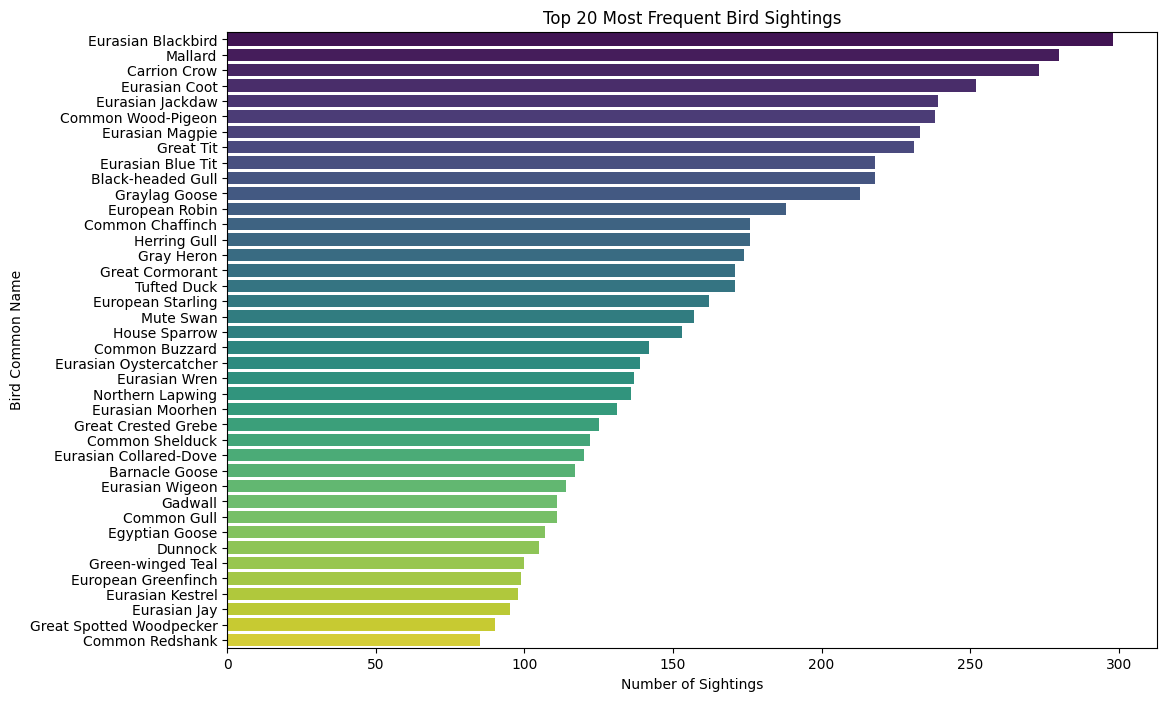

In [22]:
# Count the frequency of each bird sighting
bird_counts = data['COMMON NAME'].value_counts()

# Extract the top 40
top_40 = bird_counts.head(40)

# Plot for top 40
plt.figure(figsize=(12,8))
sns.barplot(y=top_40.index, x=top_40.values, palette='viridis')
plt.title('Top 20 Most Frequent Bird Sightings')
plt.xlabel('Number of Sightings')
plt.ylabel('Bird Common Name')
plt.show()


In [23]:
protocol_counts = data ['PROTOCOL CODE'].value_counts()
print(protocol_counts)

PROTOCOL CODE
P22    5531
P21    1926
P62    1532
P20    1011
Name: count, dtype: int64


In [24]:
# Get a random sample of 50 rows from the "PROTOCOL TYPE" column
sample_protocol_type = data['PROTOCOL TYPE'].sample(50)

print(sample_protocol_type)


5982     Traveling
2831     Traveling
9324     Traveling
680     Incidental
5611     Traveling
5201     Traveling
1819    Stationary
4528     Traveling
9770    Stationary
1433    Incidental
4014    Stationary
9472     Traveling
5376     Traveling
9089     Traveling
3152     Traveling
6692    Historical
398     Historical
8404    Incidental
7514    Historical
8651    Incidental
2733    Historical
2656    Stationary
2827     Traveling
2144    Stationary
5772    Stationary
2250     Traveling
5992     Traveling
8869     Traveling
5104     Traveling
6533     Traveling
436      Traveling
565      Traveling
5817     Traveling
1735    Historical
7442    Incidental
7625     Traveling
4594    Incidental
1324     Traveling
2980     Traveling
3023     Traveling
1482     Traveling
3027     Traveling
2516     Traveling
7109    Historical
9090     Traveling
3071     Traveling
8298    Historical
7574    Stationary
9419     Traveling
7648    Historical
Name: PROTOCOL TYPE, dtype: object


<Axes: xlabel='PROTOCOL TYPE'>

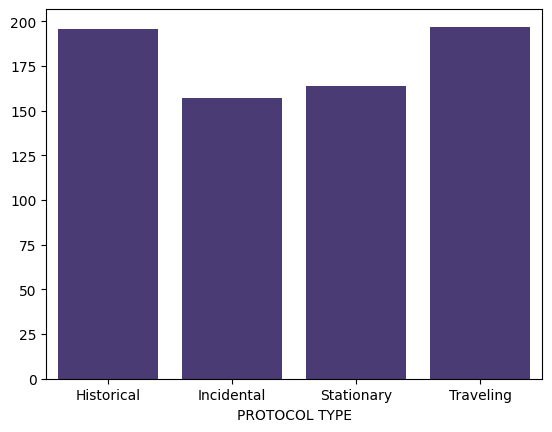

In [25]:
grouped = data.groupby('PROTOCOL TYPE')

diversity_counts = grouped['COMMON NAME'].nunique()

sns.barplot (x=diversity_counts.index, y=diversity_counts.values)







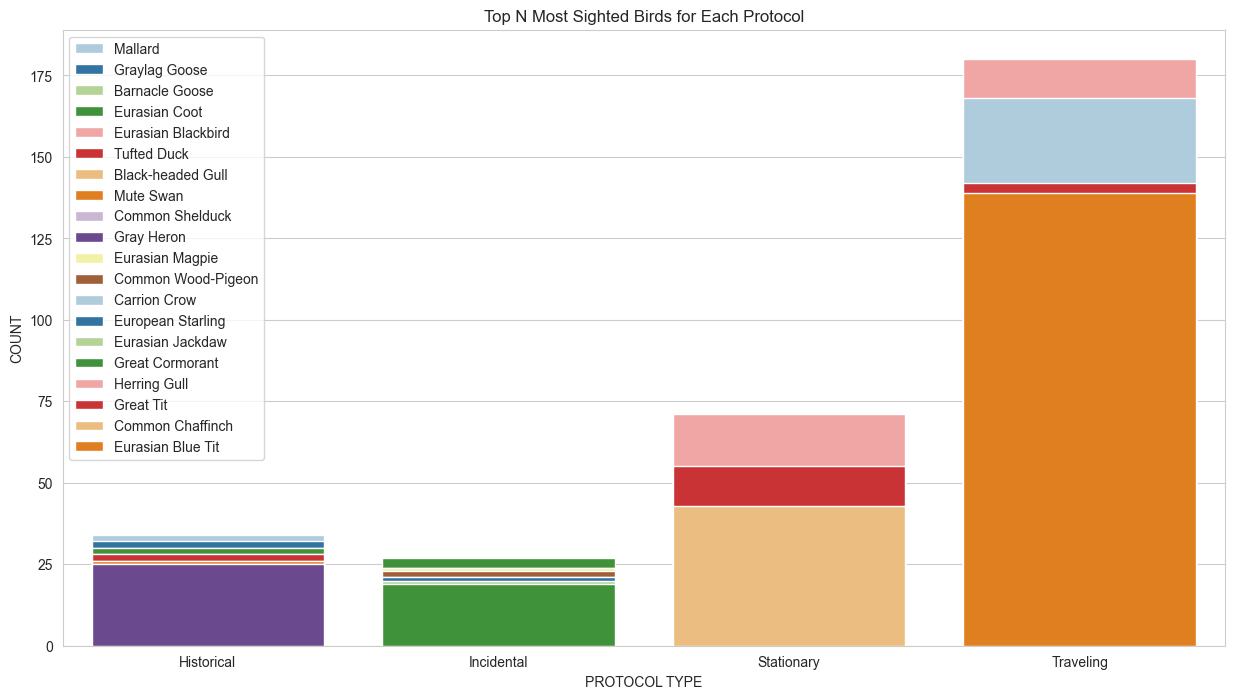

In [67]:
# plot the most sighted birds for each protocol tyoe

protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
filtered_data = data[data['PROTOCOL TYPE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')

N = 10
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)
palette = sns.color_palette("Paired", 20)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_birds_by_protocol, x='PROTOCOL TYPE', y='COUNT', hue='COMMON NAME', dodge=False, palette=palette)
plt.legend(loc='upper left')
plt.title('Top N Most Sighted Birds for Each Protocol')
plt.show()


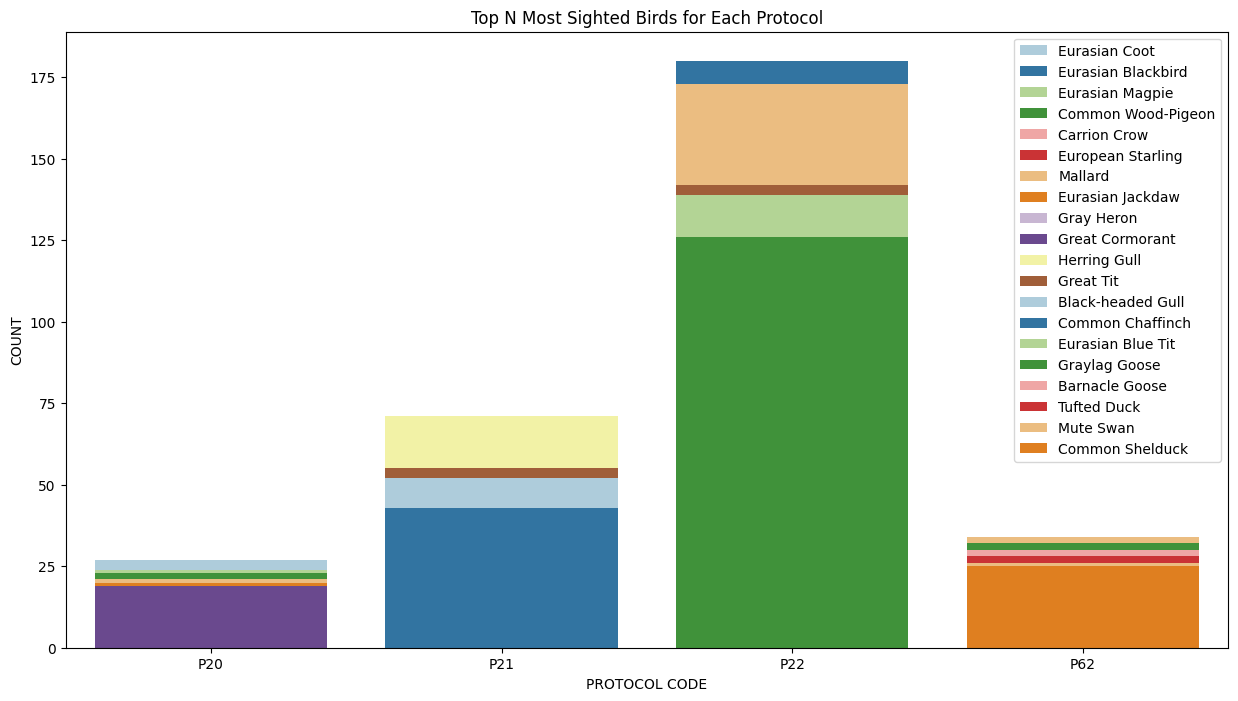

In [51]:
protocols_of_interest = ['P20', 'P62', 'P21', 'P22']
filtered_data = data[data['PROTOCOL CODE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL CODE', 'COMMON NAME']).size().reset_index(name='COUNT')


N = 10
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL CODE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)

palette = sns.color_palette("Paired", 20)
plt.figure(figsize=(15, 8))
sns.barplot(data=top_birds_by_protocol, x='PROTOCOL CODE', y='COUNT', hue='COMMON NAME', dodge=False, palette=palette)
plt.legend(loc='upper right')
plt.title('Top N Most Sighted Birds for Each Protocol')
plt.show()

In [52]:
pivot_table = data.pivot_table(index='PROTOCOL CODE', columns='PROTOCOL TYPE', values='COMMON NAME', aggfunc='count')
print(pivot_table)

PROTOCOL TYPE  Historical  Incidental  Stationary  Traveling
PROTOCOL CODE                                               
P20                   NaN      1011.0         NaN        NaN
P21                   NaN         NaN      1926.0        NaN
P22                   NaN         NaN         NaN     5531.0
P62                1532.0         NaN         NaN        NaN


In [56]:
top_birds_by_protocol_type = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')
top_10_by_protocol_type = top_birds_by_protocol_type.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)
print(top_10_by_protocol_type)


   PROTOCOL TYPE         COMMON NAME  COUNT
0     Historical             Mallard     34
1     Historical       Graylag Goose     32
2     Historical      Barnacle Goose     30
3     Historical       Eurasian Coot     30
4     Historical  Eurasian Blackbird     28
5     Historical         Tufted Duck     28
6     Historical   Black-headed Gull     26
7     Historical           Mute Swan     26
8     Historical     Common Shelduck     25
9     Historical          Gray Heron     25
10    Incidental       Eurasian Coot     27
11    Incidental  Eurasian Blackbird     24
12    Incidental     Eurasian Magpie     24
13    Incidental  Common Wood-Pigeon     23
14    Incidental        Carrion Crow     21
15    Incidental   European Starling     21
16    Incidental             Mallard     21
17    Incidental    Eurasian Jackdaw     20
18    Incidental          Gray Heron     19
19    Incidental     Great Cormorant     19
20    Stationary        Herring Gull     71
21    Stationary        Carrion 

In [57]:
top_birds_by_protocol_code = data.groupby(['PROTOCOL CODE', 'COMMON NAME']).size().reset_index(name='COUNT')
top_10_by_protocol_code = top_birds_by_protocol_code.groupby('PROTOCOL CODE').apply(lambda x: x.nlargest(10, 'COUNT')).reset_index(drop=True)
print(top_10_by_protocol_code)


   PROTOCOL CODE         COMMON NAME  COUNT
0            P20       Eurasian Coot     27
1            P20  Eurasian Blackbird     24
2            P20     Eurasian Magpie     24
3            P20  Common Wood-Pigeon     23
4            P20        Carrion Crow     21
5            P20   European Starling     21
6            P20             Mallard     21
7            P20    Eurasian Jackdaw     20
8            P20          Gray Heron     19
9            P20     Great Cormorant     19
10           P21        Herring Gull     71
11           P21        Carrion Crow     67
12           P21  Eurasian Blackbird     66
13           P21    Eurasian Jackdaw     62
14           P21     Eurasian Magpie     56
15           P21           Great Tit     55
16           P21   Black-headed Gull     52
17           P21             Mallard     52
18           P21  Common Wood-Pigeon     46
19           P21    Common Chaffinch     43
20           P22  Eurasian Blackbird    180
21           P22             Mal

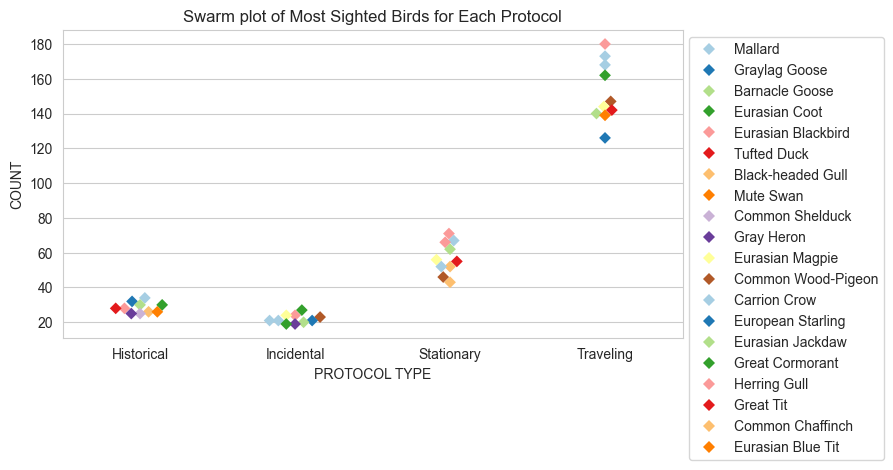

In [73]:
protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
filtered_data = data[data['PROTOCOL TYPE'].isin(protocols_of_interest)]
bird_counts_by_protocol = filtered_data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')


N = 10
top_birds_by_protocol = bird_counts_by_protocol.groupby('PROTOCOL TYPE').apply(lambda x: x.nlargest(N, 'COUNT')).reset_index(drop=True)

plt.figure(figsize=(8, 4))
sns.swarmplot(data=top_birds_by_protocol, x='PROTOCOL TYPE', y='COUNT', hue='COMMON NAME', palette=palette, size=6, marker='D')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Swarm plot of Most Sighted Birds for Each Protocol')
plt.show()



In [78]:
from scipy.stats import chi2_contingency

# this includes frequencies of less than 5 for the categorial values

#Filter data
# this includes frequencies of less than 5 for the categorial values

stat_protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
bird_frequencies = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')
filtered_data = data[data['PROTOCOL TYPE'].isin(stat_protocols_of_interest)]


# Construct contingency table
contingency_table = pd.crosstab(filtered_data['COMMON NAME'], filtered_data['PROTOCOL TYPE'])

# Performing the Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p_val < 0.05:
    print("The observed distribution of bird sightings is dependent on the protocol code.")
else:
    print("The observed distribution of bird sightings is independent of the protocol code.")

Chi-squared Statistic: 1867.224977926891
P-value: 4.80825092053884e-99
Degrees of Freedom: 738
Expected Frequencies Table:
[[1.072400e+00 7.077000e-01 1.348200e+00 3.871700e+00]
 [3.064000e-01 2.022000e-01 3.852000e-01 1.106200e+00]
 [1.532000e-01 1.011000e-01 1.926000e-01 5.531000e-01]
 [1.532000e-01 1.011000e-01 1.926000e-01 5.531000e-01]
 [1.378800e+00 9.099000e-01 1.733400e+00 4.977900e+00]
 [2.910800e+00 1.920900e+00 3.659400e+00 1.050890e+01]
 [3.064000e-01 2.022000e-01 3.852000e-01 1.106200e+00]
 [3.983200e+00 2.628600e+00 5.007600e+00 1.438060e+01]
 [1.792440e+01 1.182870e+01 2.253420e+01 6.471270e+01]
 [1.838400e+00 1.213200e+00 2.311200e+00 6.637200e+00]
 [7.660000e-01 5.055000e-01 9.630000e-01 2.765500e+00]
 [1.072400e+00 7.077000e-01 1.348200e+00 3.871700e+00]
 [1.991600e+00 1.314300e+00 2.503800e+00 7.190300e+00]
 [9.192000e-01 6.066000e-01 1.155600e+00 3.318600e+00]
 [3.370400e+00 2.224200e+00 4.237200e+00 1.216820e+01]
 [3.339760e+01 2.203980e+01 4.198680e+01 1.205758e+0

In [77]:
from scipy.stats import chi2_contingency

# Filter data
stat_protocols_of_interest = ['Stationary', 'Traveling', 'Historical', 'Incidental']
bird_frequencies = data.groupby(['PROTOCOL TYPE', 'COMMON NAME']).size().reset_index(name='COUNT')

# filtered_data = data[data['PROTOCOL TYPE'].isin(stat_protocols_of_interest)]

# filtering by frequency greater than 5
filtered_bird_frequencies = bird_frequencies[bird_frequencies['COUNT'] > 5]


# Construct contingency table
contingency_table = pd.crosstab(filtered_bird_frequencies['COMMON NAME'], filtered_bird_frequencies['PROTOCOL TYPE'])

# Performing the Chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies Table:")
print(expected)

if p_val < 0.05:
    print("The observed distribution of bird sightings is dependent on the protocol code.")
else:
    print("The observed distribution of bird sightings is independent of the protocol code.")

Chi-squared Statistic: 149.09405606765097
P-value: 1.0
Degrees of Freedom: 399
Expected Frequencies Table:
[[0.50828729 0.35911602 0.45303867 0.67955801]
 [0.25414365 0.17955801 0.22651934 0.33977901]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [0.25414365 0.17955801 0.22651934 0.33977901]
 [0.25414365 0.17955801 0.22651934 0.33977901]
 [0.50828729 0.35911602 0.45303867 0.67955801]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [0.25414365 0.17955801 0.22651934 0.33977901]
 [0.76243094 0.53867403 0.67955801 1.01933702]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [1.01657459 0.71823204 0.90607735 1.35911602]
 [0.76243094 0.53867403 0.67955801 1.01933702]
 [0.50828729 0.35911602 0.45303867 0.67955801]
 [0.25414365 0.17955801 0.22651934 0.33977901]
 [0.76243094 0.53867403 0.67955801 1.01933702]
 [1.01657459 0.71823204 0.90607735 1.35911602]


We have different p-values when filtering for > 5 (recommended for chi-test) so we must conclude the distribution of sightings is independent